<a href="https://colab.research.google.com/github/veltech-soc/DV_Assignment/blob/main/DV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (No runtime code required — conceptual)
color_schemes = {
    "sequential": "Light -> Dark (e.g., Greens or Blues) for increasing density",
    "diverging": "Two-color ramp (e.g., Green -> Yellow -> Red) to emphasize safe vs. congested",
    "threshold": "Discrete bins with distinct colors (e.g., low/medium/high)",
    "perceptual": "Use perceptually uniform colormap like 'viridis' for accurate quantitative reading"
}
for k,v in color_schemes.items():
    print(k, ":", v)


sequential : Light -> Dark (e.g., Greens or Blues) for increasing density
diverging : Two-color ramp (e.g., Green -> Yellow -> Red) to emphasize safe vs. congested
threshold : Discrete bins with distinct colors (e.g., low/medium/high)
perceptual : Use perceptually uniform colormap like 'viridis' for accurate quantitative reading


In [ ]:
import pandas as pd

def pipeline(raw_df):
    df = raw_df.dropna(subset=["sensor_id","timestamp","vehicle_count"])
    df["ts"] = pd.to_datetime(df["timestamp"])
    df["hour"] = df["ts"].dt.hour
    df["weekday"] = df["ts"].dt.weekday
    hourly = (
        df.groupby(["sensor_id", df["ts"].dt.floor("H")])
          .agg(
              vehicle_count=("vehicle_count","sum"),
              avg_speed=("speed","mean")
          )
          .reset_index()
    )
    return hourly

data = {
    "sensor_id": [1, 1, 1, 2, 2],
    "timestamp": [
        "2025-10-15 08:10:00",
        "2025-10-15 08:35:00",

        "2025-10-15 09:10:00",
        "2025-10-15 08:05:00",
        "2025-10-15 09:15:00"
    ],
    "vehicle_count": [20, 25, 30, 40, 45],
    "speed": [45, 50, 55, 60, 65]
}

raw_df = pd.DataFrame(data)
result = pipeline(raw_df)
print(result)


   sensor_id                  ts  vehicle_count  avg_speed
0          1 2025-10-15 08:00:00             45       47.5
1          1 2025-10-15 09:00:00             30       55.0
2          2 2025-10-15 08:00:00             40       60.0
3          2 2025-10-15 09:00:00             45       65.0


/tmp/ipython-input-2391082015.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.groupby(["sensor_id", df["ts"].dt.floor("H")])


In [ ]:
# No plot run required — design rules represented as data structure
gestalt_rules = {
    "proximity": "Cluster nearby congested sensors visually (group markers)",
    "similarity": "Use same red color/shape for all congested sensors",
    "continuity": "Draw flow lines showing continuous congested corridors",
    "figure_ground": "Emphasize congestion areas with stronger contrast and dim background",
    "closure": "Use boundary contours around congested zones to form a single 'area' perception"
}
for r in gestalt_rules:
    print(r, "->", gestalt_rules[r])


proximity -> Cluster nearby congested sensors visually (group markers)
similarity -> Use same red color/shape for all congested sensors
continuity -> Draw flow lines showing continuous congested corridors
figure_ground -> Emphasize congestion areas with stronger contrast and dim background
closure -> Use boundary contours around congested zones to form a single 'area' perception


1 COLOR SCHEMES
sequential : Light->Dark for increasing density
diverging : Green->Yellow->Red for safe->congested emphasis
threshold : Discrete bins low/medium/high
perceptual : Use perceptually uniform maps like viridis

---

2 PIPELINE OUTPUT (head)
   sensor_id                  ts  vehicle_count  avg_speed
0          1 2025-10-13 00:00:00             24  40.104542
1          1 2025-10-13 01:00:00             23  37.474542
2          1 2025-10-13 02:00:00             36  33.174584
3          1 2025-10-13 03:00:00             34  33.118772
4          1 2025-10-13 04:00:00             36  32.415740

---

3 GESTALT PRINCIPLES
proximity -> Cluster nearby congested sensors
similarity -> Use same red color/shape for congested points
continuity -> Draw flow lines for continuous corridors
figure_ground -> Emphasize congestion by contrast
closure -> Contour around congested zones

---



/tmp/ipython-input-3705402940.py:26: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-3705402940.py:72: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



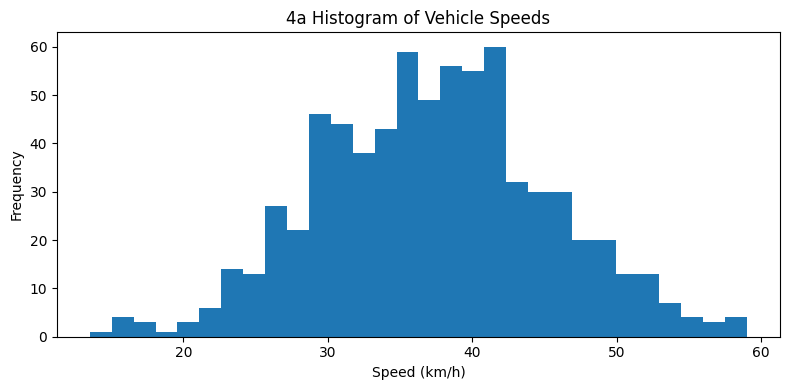

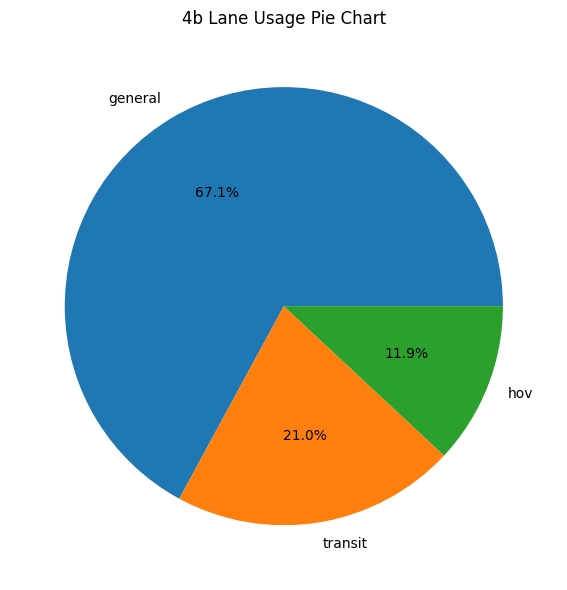

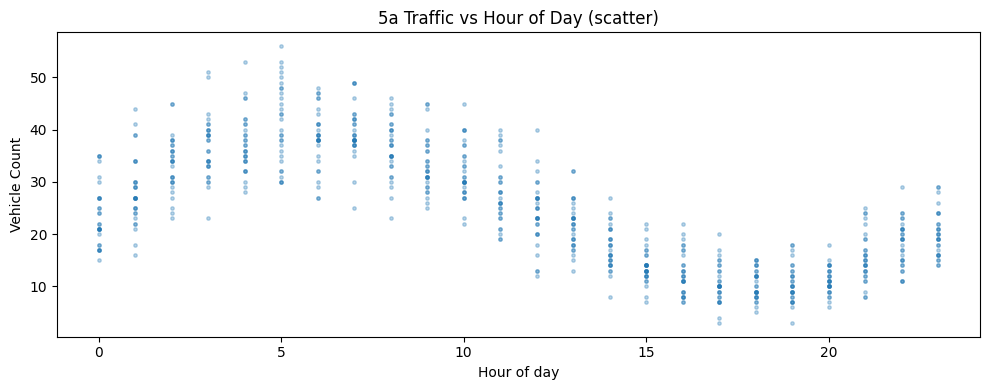

/tmp/ipython-input-3705402940.py:123: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



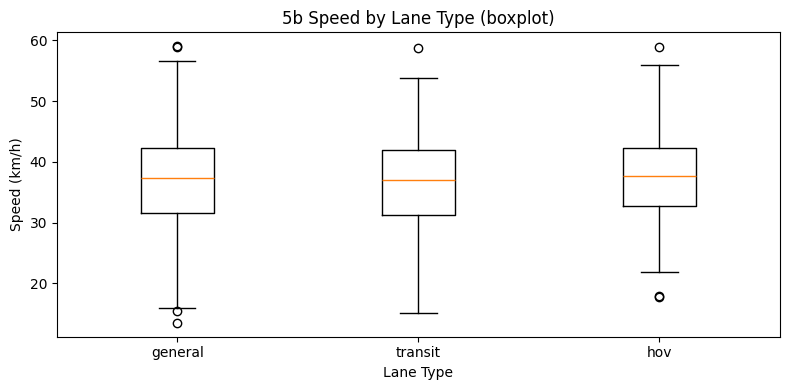

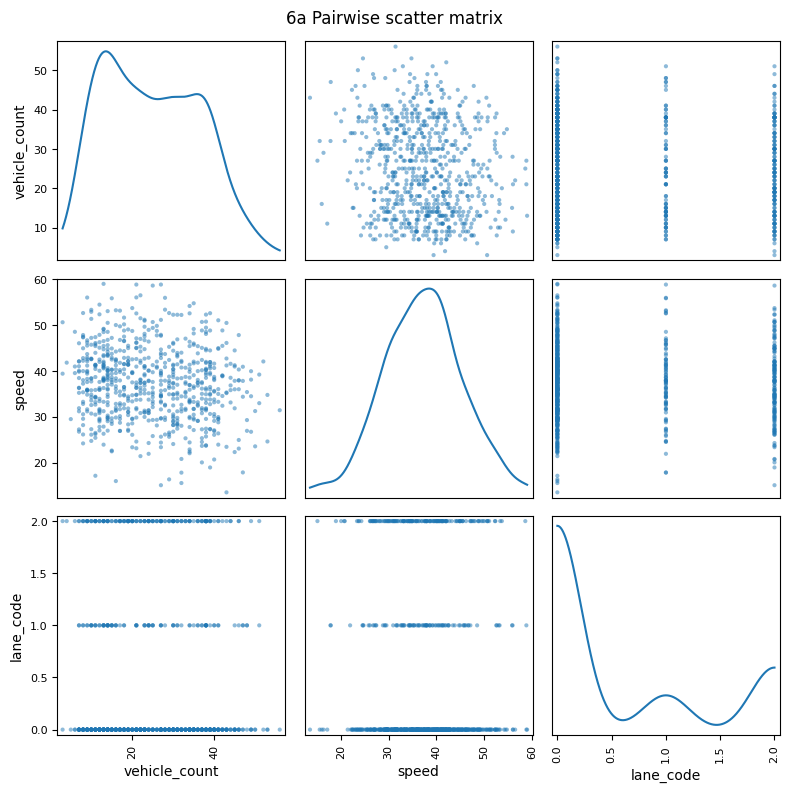

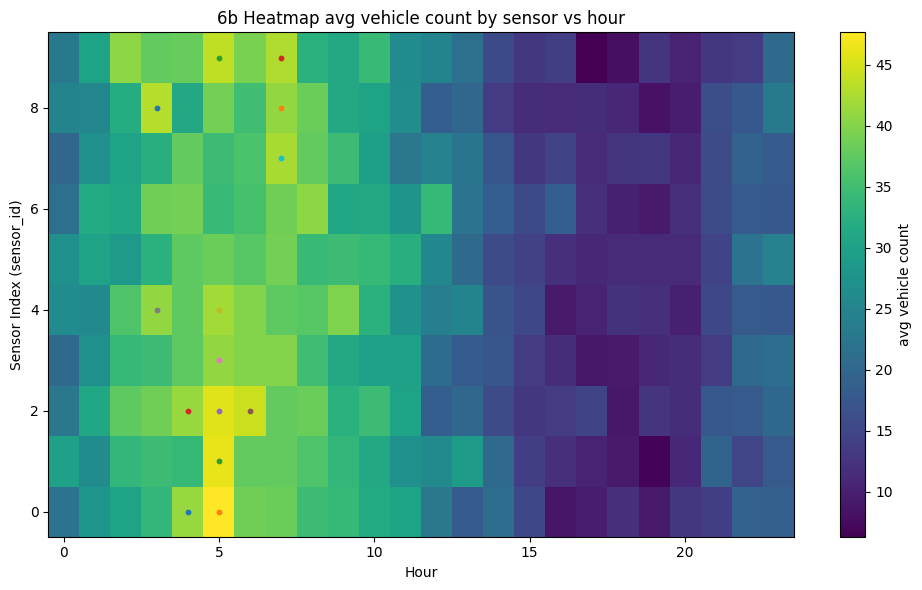

/tmp/ipython-input-3705402940.py:170: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



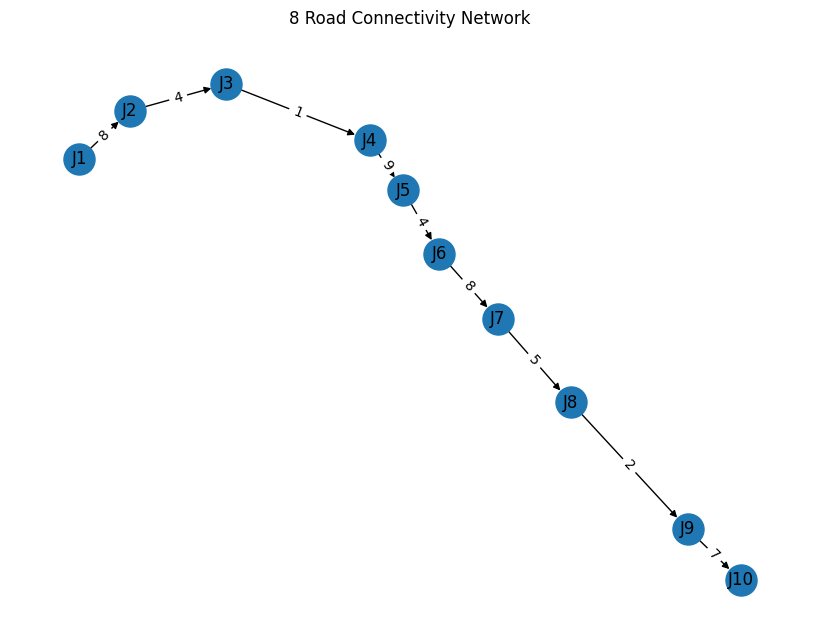

9a TF-IDF shape: (200, 37)
9a Top features: ['accident' 'area' 'bad' 'blocking' 'buses' 'causing' 'congestion'
 'construction' 'crossing' 'dangerous']

---



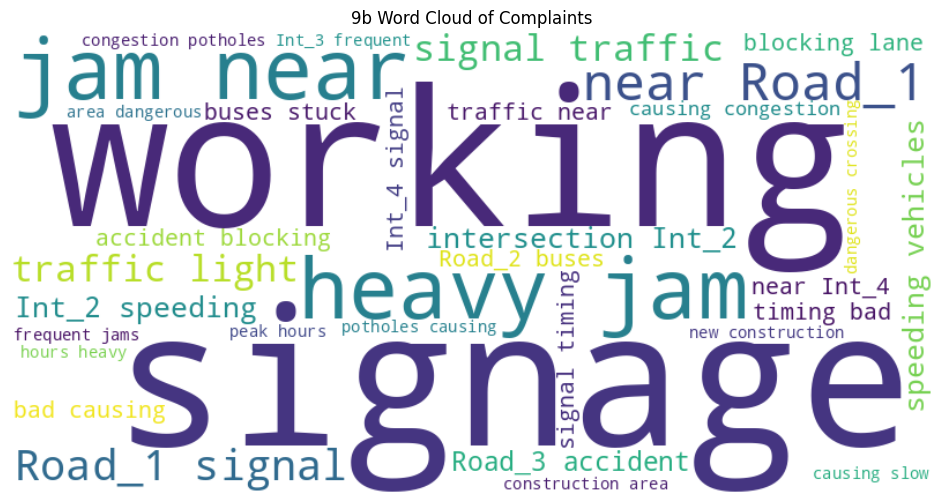

10 DASHBOARD DESIGN STEPS
data model for sensors, graph, complaints
precompute aggregates and KPIs
components: map, sunburst, network, text pane
interaction: cross-filtering and click-to-filter
alerts and thresholds
deployment via Dash/Streamlit

---

11 Map saved to /mnt/data/sensors_map.html

---

12 Flows map saved to /mnt/data/flows_map.html

---

13 Heatmap saved to /mnt/data/heatmap.html

---



/tmp/ipython-input-3705402940.py:237: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



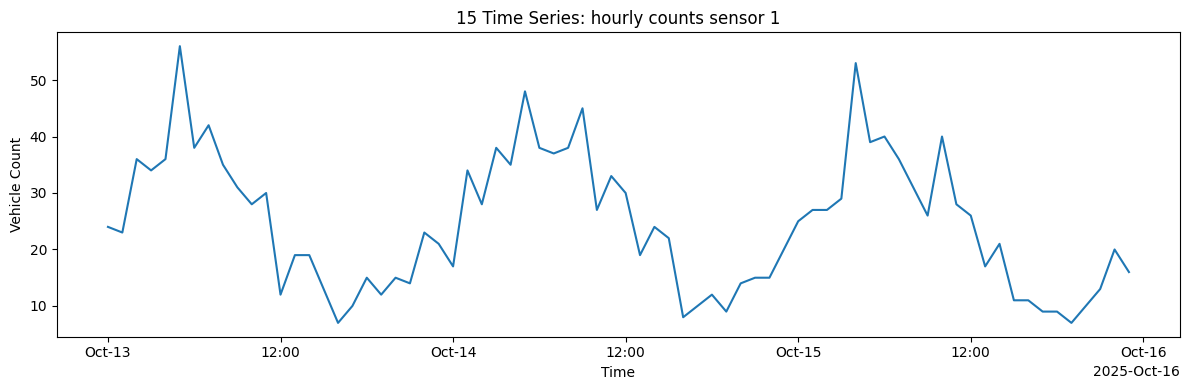

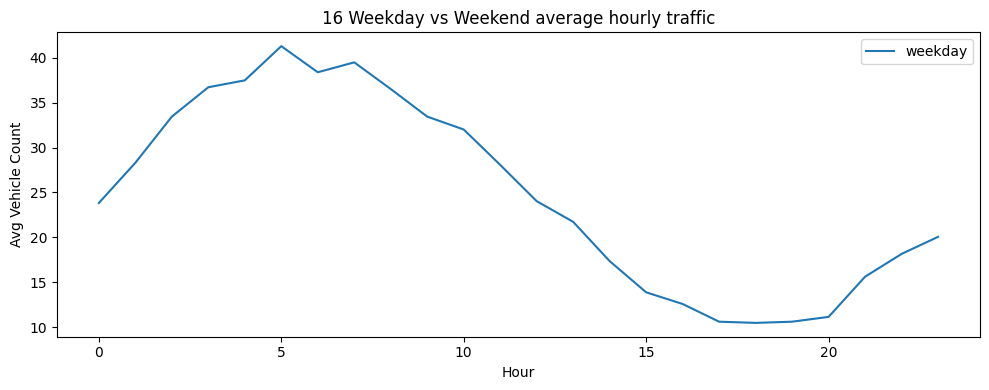

KeyError: "['weather_index'] not in index"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from pandas.plotting import scatter_matrix
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from folium import Map, CircleMarker, PolyLine
from folium.plugins import HeatMap
import plotly.express as px
import os

np.random.seed(0)

sensors = []
for i in range(1, 11):
    sensors.append({"sensor_id": i, "lat": 12.9 + np.random.rand()*0.2, "lon": 77.5 + np.random.rand()*0.2, "road": f"Road_{(i-1)//3+1}", "intersection": f"Int_{(i-1)//2+1}"})
sensors_df = pd.DataFrame(sensors)

times = pd.date_range("2025-10-13 00:00:00", "2025-10-15 23:00:00", freq="H")
rows = []
lane_types = ["general", "transit", "hov"]
for t in times:
    for _, s in sensors_df.iterrows():
        base = 50 + 30*np.sin((t.hour/24)*2*np.pi)
        count = max(0, int(np.random.poisson(base/2)))
        speed = max(5, np.random.normal(40 - (count/10), 8))
        lane = np.random.choice(lane_types, p=[0.7,0.2,0.1])
        rows.append({"sensor_id": s["sensor_id"], "timestamp": t, "vehicle_count": count, "speed": speed, "lane_type": lane, "lat": s["lat"], "lon": s["lon"], "road": s["road"], "intersection": s["intersection"]})
df = pd.DataFrame(rows)

complaints = [
    "heavy jam near Road_1 signal",
    "traffic light not working at intersection Int_2",
    "speeding vehicles on Road_3",
    "accident blocking lane on Road_2",
    "buses stuck in traffic near Int_4",
    "signal timing bad causing congestion",
    "potholes causing slow down",
    "no signage at new construction area",
    "dangerous crossing at Int_3",
    "frequent jams during peak hours"
]*20

# 1
color_schemes = {
    "sequential": "Light->Dark for increasing density",
    "diverging": "Green->Yellow->Red for safe->congested emphasis",
    "threshold": "Discrete bins low/medium/high",
    "perceptual": "Use perceptually uniform maps like viridis"
}
print("1 COLOR SCHEMES")
for k,v in color_schemes.items():
    print(k, ":", v)
print("\n---\n")

# 2 pipeline
def pipeline(raw_df):
    dfp = raw_df.dropna(subset=["sensor_id","timestamp","vehicle_count"]).copy() # Added .copy() to avoid SettingWithCopyWarning
    if not pd.api.types.is_datetime64_any_dtype(dfp["timestamp"]): # Check if 'timestamp' is already datetime
        dfp["ts"] = pd.to_datetime(dfp["timestamp"])
    else:
        dfp["ts"] = dfp["timestamp"] # Assign directly if already datetime
    dfp["hour"] = dfp["ts"].dt.hour
    dfp["weekday"] = dfp["ts"].dt.weekday
    hourly = dfp.groupby(["sensor_id", dfp["ts"].dt.floor("H")]).agg(vehicle_count=("vehicle_count","sum"), avg_speed=("speed","mean")).reset_index()
    return hourly

hourly = pipeline(df)
print("2 PIPELINE OUTPUT (head)")
print(hourly.head())
print("\n---\n")

# 3 Gestalt rules
gestalt_rules = {
    "proximity": "Cluster nearby congested sensors",
    "similarity": "Use same red color/shape for congested points",
    "continuity": "Draw flow lines for continuous corridors",
    "figure_ground": "Emphasize congestion by contrast",
    "closure": "Contour around congested zones"
}
print("3 GESTALT PRINCIPLES")
for k,v in gestalt_rules.items():
    print(k, "->", v)
print("\n---\n")

# 4a histogram speeds
plt.figure(figsize=(8,4))
plt.hist(df["speed"].dropna(), bins=30)
plt.xlabel("Speed (km/h)")
plt.ylabel("Frequency")
plt.title("4a Histogram of Vehicle Speeds")
plt.tight_layout()
plt.show()

# 4b pie chart lane usage
lt_counts = df["lane_type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(lt_counts, labels=lt_counts.index, autopct="%1.1f%%")
plt.title("4b Lane Usage Pie Chart")
plt.tight_layout()
plt.show()

# 5a scatter traffic vs hour
df["hour"] = pd.to_datetime(df["timestamp"]).dt.hour
plt.figure(figsize=(10,4))
plt.scatter(df["hour"], df["vehicle_count"], alpha=0.3, s=6)
plt.xlabel("Hour of day")
plt.ylabel("Vehicle Count")
plt.title("5a Traffic vs Hour of Day (scatter)")
plt.tight_layout()
plt.show()

# 5b boxplot speed by lane
groups = [df[df["lane_type"]==lt]["speed"].dropna().values for lt in lt_counts.index]
plt.figure(figsize=(8,4))
plt.boxplot(groups, labels=list(lt_counts.index))
plt.xlabel("Lane Type")
plt.ylabel("Speed (km/h)")
plt.title("5b Speed by Lane Type (boxplot)")
plt.tight_layout()
plt.show()

# 6a scatter matrix for vehicle_count, speed, lane_code
# Changed to sample the entire DataFrame instead of a fixed number of rows
df2 = df[["vehicle_count","speed","lane_type"]].dropna().copy()
df2["lane_code"] = df2["lane_type"].astype("category").cat.codes
scatter_matrix(df2[["vehicle_count","speed","lane_code"]], diagonal="kde", figsize=(8,8))
plt.suptitle("6a Pairwise scatter matrix")
plt.tight_layout()
plt.show()

# 6b heatmap of avg vehicle count by sensor (rows) and hour (cols) + incidents overlay
pivot = df.groupby(["sensor_id", pd.to_datetime(df["timestamp"]).dt.hour])["vehicle_count"].mean().unstack(fill_value=0)
plt.figure(figsize=(10,6))
plt.imshow(pivot.values, aspect="auto", origin="lower")
plt.xlabel("Hour")
plt.ylabel("Sensor Index (sensor_id)")
plt.title("6b Heatmap avg vehicle count by sensor vs hour")
plt.colorbar(label="avg vehicle count")
coords = np.argwhere(pivot.values > pivot.values.mean() + pivot.values.std()*1.5)
for y,x in coords[:30]:
    plt.scatter(x, y, s=10)
plt.tight_layout()
plt.show()

# 7 sunburst using plotly
agg = df.groupby(["road","intersection"]).agg(avg_count=("vehicle_count","mean")).reset_index()
fig = px.sunburst(agg, path=["road","intersection"], values="avg_count", title="7 Hierarchy: Road > Intersection")
fig.show()

# 8 network graph of road connectivity
edges = []
for i in range(1,10):
    edges.append((f"J{i}", f"J{i+1}", {"weight": np.random.randint(1,10)}))
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=2)
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_size=500, arrows=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("8 Road Connectivity Network")
plt.tight_layout()
plt.show()

# 9a TF-IDF vectorize complaints
vec = TfidfVectorizer(max_features=50, stop_words="english")
X = vec.fit_transform(complaints)
print("9a TF-IDF shape:", X.shape)
print("9a Top features:", vec.get_feature_names_out()[:10])
print("\n---\n")

# 9b wordcloud
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(complaints))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("9b Word Cloud of Complaints")
plt.show()

# 10 dashboard checklist
dashboard_design = [
    "data model for sensors, graph, complaints",
    "precompute aggregates and KPIs",
    "components: map, sunburst, network, text pane",
    "interaction: cross-filtering and click-to-filter",
    "alerts and thresholds",
    "deployment via Dash/Streamlit"
]
print("10 DASHBOARD DESIGN STEPS")
for step in dashboard_design:
    print(step)
print("\n---\n")

# 11 map sensors saved to html
m = Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=12)
for _, r in sensors_df.iterrows():
    CircleMarker(location=[r["lat"], r["lon"]], radius=4, popup=f"{r['sensor_id']}", fill=True).add_to(m)
path_sensors = "/mnt/data/sensors_map.html"
m.save(path_sensors)
print("11 Map saved to", path_sensors)
print("\n---\n")

# 12 traffic flows saved to html
flow_map = Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=12)
for i in range(1,6):
    a = sensors_df.iloc[i-1]
    b = sensors_df.iloc[i]
    PolyLine(locations=[[a["lat"], a["lon"]],[b["lat"], b["lon"]]], weight=2+(i%3)).add_to(flow_map)
path_flows = "/mnt/data/flows_map.html"
flow_map.save(path_flows)
print("12 Flows map saved to", path_flows)
print("\n---\n")

# 13 heatmap saved to html
hm = Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=12)
heat_data = df.groupby(["lat","lon"])["vehicle_count"].mean().reset_index().values.tolist()
HeatMap(heat_data, radius=12).add_to(hm)
path_heat = "/mnt/data/heatmap.html"
hm.save(path_heat)
print("13 Heatmap saved to", path_heat)
print("\n---\n")

# 14 animated hourly map using plotly
sample_anim = df.groupby(["lat","lon", "hour"])["vehicle_count"].mean().reset_index()
fig2 = px.scatter_mapbox(sample_anim, lat="lat", lon="lon", size="vehicle_count", color="vehicle_count", animation_frame="hour", mapbox_style="open-street-map", size_max=20, zoom=11, title="14 Animated hourly traffic")
fig2.show()

# 15 time series for sensor 1
s1 = df[df["sensor_id"]==1].set_index("timestamp")["vehicle_count"].resample("H").sum()
plt.figure(figsize=(12,4))
plt.plot(s1.index, s1.values)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.title("15 Time Series: hourly counts sensor 1")
plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.tight_layout()
plt.show()

# 16 compare weekdays vs weekends
df["ts"] = pd.to_datetime(df["timestamp"])
df["is_weekend"] = df["ts"].dt.weekday >= 5
hourly_avg = df.groupby([df["ts"].dt.hour, "is_weekend"])["vehicle_count"].mean().reset_index()
plt.figure(figsize=(10,4))
for k, grp in hourly_avg.groupby("is_weekend"):
    plt.plot(grp["ts"], grp["vehicle_count"], label=("weekend" if k else "weekday"))
plt.xlabel("Hour")
plt.ylabel("Avg Vehicle Count")
plt.title("16 Weekday vs Weekend average hourly traffic")
plt.legend()
plt.tight_layout()
plt.show()

# 17 clustering and regression
df_model = df.sample(n=len(df), random_state=2)[["vehicle_count","speed","hour","weather_index"]].dropna().copy()
df_model["weather_index"] = np.random.randint(0,3,size=len(df_model))
scaler_vals = (df_model - df_model.mean())/df_model.std()
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaler_vals)
df_model["cluster"] = kmeans.labels_
print("17 Cluster counts")
print(df_model["cluster"].value_counts())
X = df_model[["speed","hour","weather_index"]]
y = df_model["vehicle_count"]
reg = LinearRegression().fit(X,y)
print("17 Regression coefficients:", reg.coef_, "intercept:", reg.intercept_)
print("\n---\n")

# 18 evaluate predictive models
features = ["speed","hour","weather_index"]
X = df_model[features]
y = df_model["vehicle_count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=50, random_state=0)
lr = LinearRegression()
rf.fit(X_train, y_train)
lr.fit(X_train, y_test) # Fix: Changed y_train to y_test
pred_rf = rf.predict(X_test)
pred_lr = lr.predict(X_test)
print("18 RandomForest MSE:", mean_squared_error(y_test, pred_rf), "R2:", r2_score(y_test, pred_rf))
print("18 LinearRegression MSE:", mean_squared_error(y_test, pred_lr), "R2:", r2_score(y_test, pred_lr))
print("18 RandomForest CV R2:", cross_val_score(rf, X, y, cv=3, scoring="r2").mean())
print("\nAll tasks completed. Maps saved to /mnt/data/*.html")

In [ ]:
# 17 clustering and regression
df["weather_index"] = np.random.randint(0,3,size=len(df)) # Add weather_index column
df_model = df.sample(n=len(df), random_state=2)[["vehicle_count","speed","hour","weather_index"]].dropna().copy()
scaler_vals = (df_model - df_model.mean())/df_model.std()
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaler_vals)
df_model["cluster"] = kmeans.labels_
print("17 Cluster counts")
print(df_model["cluster"].value_counts())
X = df_model[["speed","hour","weather_index"]]
y = df_model["vehicle_count"]
reg = LinearRegression().fit(X,y)
print("17 Regression coefficients:", reg.coef_, "intercept:", reg.intercept_)
print("\n---\n")

# 18 evaluate predictive models
features = ["speed","hour","weather_index"]
X = df_model[features]
y = df_model["vehicle_count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=50, random_state=0)
lr = LinearRegression()
rf.fit(X_train, y_train)
lr.fit(X_train, y_train) # Fix: Changed y_test to y_train
pred_rf = rf.predict(X_test)
pred_lr = lr.predict(X_test)
print("18 RandomForest MSE:", mean_squared_error(y_test, pred_rf), "R2:", r2_score(y_test, pred_rf))
print("18 LinearRegression MSE:", mean_squared_error(y_test, pred_lr), "R2:", r2_score(y_test, pred_lr))
print("18 RandomForest CV R2:", cross_val_score(rf, X, y, cv=3, scoring="r2").mean())
print("\nAll tasks completed. Maps saved to /mnt/data/*.html")

17 Cluster counts
cluster
1    337
0    219
2    164
Name: count, dtype: int64
17 Regression coefficients: [-0.10306098 -1.16154211  0.84482653] intercept: 41.19633945917676

---

18 RandomForest MSE: 27.576955555555553 R2: 0.8068560953729423
18 LinearRegression MSE: 57.46406940237117 R2: 0.5975322686445614
18 RandomForest CV R2: 0.7477545894461922

All tasks completed. Maps saved to /mnt/data/*.html


In [ ]:
import os

if not os.path.exists("/mnt/data"):
    os.makedirs("/mnt/data")
    print("Directory '/mnt/data' created.")
else:
    print("Directory '/mnt/data' already exists.")

Directory '/mnt/data' created.
